Dataset Basic info:

- Train images (and after agumentation):

        - Normal Images: 1349 (2338)
        - Virus images: 1345 (2341)
        - Bacteria images: 2538 (same)
        - Total: 5232

- Test images:

        - Normal Images: 234 (same)
        - Virus images: 148 (246)
        - Bacteria images: 242 (same)
        - Total: 624


In [2]:
# libraries
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# Chest X-Ray Pneumonia Prediction

In [3]:
# Loading data from CSVs to open images
train_df = pd.read_csv('../data/chest_pneumonia/training_data.csv')
train_df.head()

,path,shape,rows,columns,label
0,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
1,data/chest_pneumonia/train/normal/NORMAL2-IM-0...,"(2234, 2359)",2234,2359,Healthy
2,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
3,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
4,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy


In [4]:
test_df = pd.read_csv('../data/chest_pneumonia/test_data.csv')
test_df.tail()

,path,shape,rows,columns,label
717,data/chest_pneumonia/test/pneumonia/person120_...,"(688, 1024)",688,1024,Bacterial
718,data/chest_pneumonia/test/pneumonia/person171_...,"(672, 1088)",672,1088,Bacterial
719,data/chest_pneumonia/test/pneumonia/person109_...,"(808, 1256)",808,1256,Bacterial
720,data/chest_pneumonia/test/pneumonia/person83_b...,"(648, 912)",648,912,Bacterial
721,data/chest_pneumonia/test/pneumonia/person112_...,"(640, 952)",640,952,Bacterial


## Resizing images

In [5]:
max_rows_train = max(train_df['rows'])
max_cols_train = max(train_df['columns'])
max_rows_test = max(test_df['rows'])
max_cols_test = max(test_df['columns'])
biggest_dim = max(max_rows_train, max_cols_train, max_rows_test, max_cols_test)

In [7]:
# Training images

train_imgs = np.zeros([len(train_df), biggest_dim // 10, biggest_dim // 10], dtype = 'uint8')
for i in range(len(train_df)):
    img = cv2.imread('../' + train_df['path'][i], 0)
    if img.shape != (biggest_dim //10, biggest_dim // 10):
        train_imgs[i] = cv2.resize(img, dsize=(biggest_dim //10, biggest_dim // 10,), interpolation= cv2.INTER_CUBIC)
     
# Reshaping for keras input
train_imgs = train_imgs.reshape(train_imgs.shape[0], train_imgs.shape[1], train_imgs.shape[2], 1)

In [8]:
train_imgs.shape

(7217, 291, 291, 1)

In [9]:
# Test images
test_imgs = np.zeros([len(test_df), biggest_dim // 10, biggest_dim // 10], dtype = 'uint8')
for i in range(len(test_df)):
    img = cv2.imread('../' + test_df['path'][i], 0)
    if img.shape != (biggest_dim //10, biggest_dim // 10):
        test_imgs[i] = cv2.resize(img, dsize=(biggest_dim //10, biggest_dim // 10), interpolation= cv2.INTER_CUBIC)
     
# Reshaping for keras input
test_imgs = test_imgs.reshape(test_imgs.shape[0], test_imgs.shape[1], test_imgs.shape[2], 1)

In [10]:
test_imgs.shape

(722, 291, 291, 1)

## Image Augmentation

We need to expand our dataset, specifically we need around 1000 healthy training images, 1000 virus training images and 100 virus test images

In [12]:
# Default value
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30, vertical_flip=True, horizontal_flip=True, shear_range=15)

## Train Healthy Expansion

In [21]:
# Finding healthy images
train_df[train_df['label'] == 'Healthy'].head(10)

,path,shape,rows,columns,label
0,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
1,data/chest_pneumonia/train/normal/NORMAL2-IM-0...,"(2234, 2359)",2234,2359,Healthy
2,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
3,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
4,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
5,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
6,data/chest_pneumonia/train/normal/NORMAL2-IM-1...,"(1067, 1422)",1067,1422,Healthy
7,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
8,data/chest_pneumonia/train/normal/IM-0427-0001...,"(1357, 1828)",1357,1828,Healthy
9,data/chest_pneumonia/train/normal/NORMAL2-IM-1...,"(1495, 1854)",1495,1854,Healthy


Text(0.5, 1.0, 'Label: Healthy')

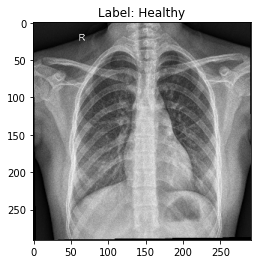

In [22]:
n = 1
plt.imshow(train_imgs[n], cmap='gray')
plt.title('Label: ' + str(test_df['label'][n]))

In [ ]:
i = 0
for batch in datagen.flow(train_imgs[[1, 6, 8, 9]], batch_size = 1, save_to_dir='../data/chest_pneumonia/train/normal', save_prefix='train_h_aug', save_format='jpeg'):
    i += 1
    if i >= 1000:
        break

## Train Virus Expansion

In [23]:
# Finding virus images
train_df[train_df['label'] == 'Virus'].head(10)

,path,shape,rows,columns,label
2340,data/chest_pneumonia/train/pneumonia/train_vir...,"(291, 291)",291,291,Virus
2342,data/chest_pneumonia/train/pneumonia/person478...,"(888, 1224)",888,1224,Virus
2344,data/chest_pneumonia/train/pneumonia/train_vir...,"(291, 291)",291,291,Virus
2347,data/chest_pneumonia/train/pneumonia/person135...,"(1024, 1408)",1024,1408,Virus
2349,data/chest_pneumonia/train/pneumonia/person124...,"(1256, 1336)",1256,1336,Virus
2353,data/chest_pneumonia/train/pneumonia/train_vir...,"(291, 291)",291,291,Virus
2356,data/chest_pneumonia/train/pneumonia/train_vir...,"(291, 291)",291,291,Virus
2361,data/chest_pneumonia/train/pneumonia/person535...,"(912, 1368)",912,1368,Virus
2363,data/chest_pneumonia/train/pneumonia/train_vir...,"(291, 291)",291,291,Virus
2365,data/chest_pneumonia/train/pneumonia/person123...,"(656, 1224)",656,1224,Virus


Text(0.5, 1.0, 'Label: Virus')

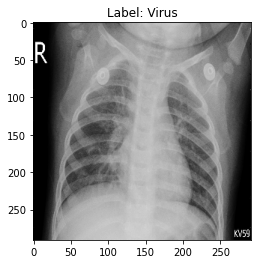

In [24]:
n = 2342
plt.imshow(train_imgs[n], cmap='gray')
plt.title('Label: ' + str(train_df['label'][n]))

In [ ]:
i = 0
for batch in datagen.flow(train_imgs[[2342, 2347, 2361, 2365]], batch_size = 1, save_to_dir='../data/chest_pneumonia/train/pneumonia', save_prefix='train_vir_aug', save_format='jpeg'):
    i += 1
    if i >= 1000:
        break

## Test Virus Expansion

In [15]:
# Finding virus images
test_df[test_df['label'] == 'Virus'].head(10)

,path,shape,rows,columns,label
234,data/chest_pneumonia/test/pneumonia/test_vir_a...,"(291, 291)",291,291,Virus
237,data/chest_pneumonia/test/pneumonia/test_vir_a...,"(291, 291)",291,291,Virus
238,data/chest_pneumonia/test/pneumonia/test_vir_a...,"(291, 291)",291,291,Virus
241,data/chest_pneumonia/test/pneumonia/person1647...,"(768, 1168)",768,1168,Virus
242,data/chest_pneumonia/test/pneumonia/person1675...,"(520, 952)",520,952,Virus
244,data/chest_pneumonia/test/pneumonia/person35_v...,"(1016, 1552)",1016,1552,Virus
247,data/chest_pneumonia/test/pneumonia/person1662...,"(672, 1160)",672,1160,Virus
248,data/chest_pneumonia/test/pneumonia/test_vir_a...,"(291, 291)",291,291,Virus
250,data/chest_pneumonia/test/pneumonia/person1669...,"(736, 1288)",736,1288,Virus
251,data/chest_pneumonia/test/pneumonia/test_vir_a...,"(291, 291)",291,291,Virus


Text(0.5, 1.0, 'Label: Bacterial')

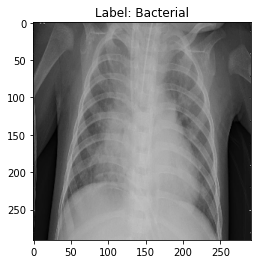

In [20]:
n = 246
plt.imshow(test_imgs[n], cmap='gray')
plt.title('Label: ' + str(test_df['label'][n]))
# 238, 241, 246, 247, 252, 256, 609

In [14]:
i = 0
for batch in datagen.flow(test_imgs[[238, 241, 246, 247, 252, 256, 609]], batch_size = 1, save_to_dir='../data/chest_pneumonia/test/pneumonia', save_prefix='test_vir_aug', save_format='jpeg'):
    i += 1
    if i >= 100:
        break